In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
# Load Airlines Passengers data
airlines_data = pd.read_csv('/Users/yeshwanthsatyadev/Desktop/Airlines+Data.csv')

In [4]:
# Convert the 'Month' column to datetime
airlines_data['Month'] = pd.to_datetime(airlines_data['Month'], format='%b-%y')

In [5]:
# Set 'Month' as the index
airlines_data.set_index('Month', inplace=True)

In [6]:
# Train-test split
train_size = int(len(airlines_data) * 0.8)
train, test = airlines_data[0:train_size], airlines_data[train_size:]

In [7]:
# Fit SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train['Passengers'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [8]:
# Forecast
forecast = model_fit.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

In [9]:
# Evaluate the model
mse = mean_squared_error(test['Passengers'], predicted_values)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 34.334660266172314


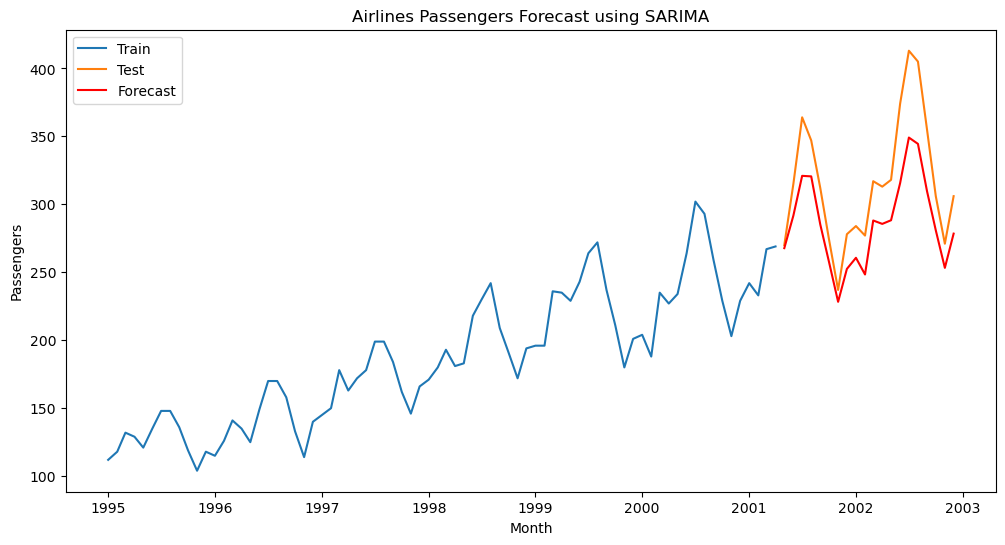

In [10]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('Airlines Passengers Forecast using SARIMA')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()